In [ ]:
!kaggle datasets download -d sonalisingh1411/mallcustomersdataset   #Mall-customers-dataset

Dataset URL: https://www.kaggle.com/datasets/sonalisingh1411/mallcustomersdataset
License(s): unknown
  0% 0.00/1.56k [00:00<?, ?B/s]
100% 1.56k/1.56k [00:00<00:00, 208kB/s]


In [ ]:
!unzip -q /content/mallcustomersdataset.zip -d /content/sample_data

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/mallcustomersdataset.zip")

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
required_columns = df.iloc[:,2:5]
required_columns

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

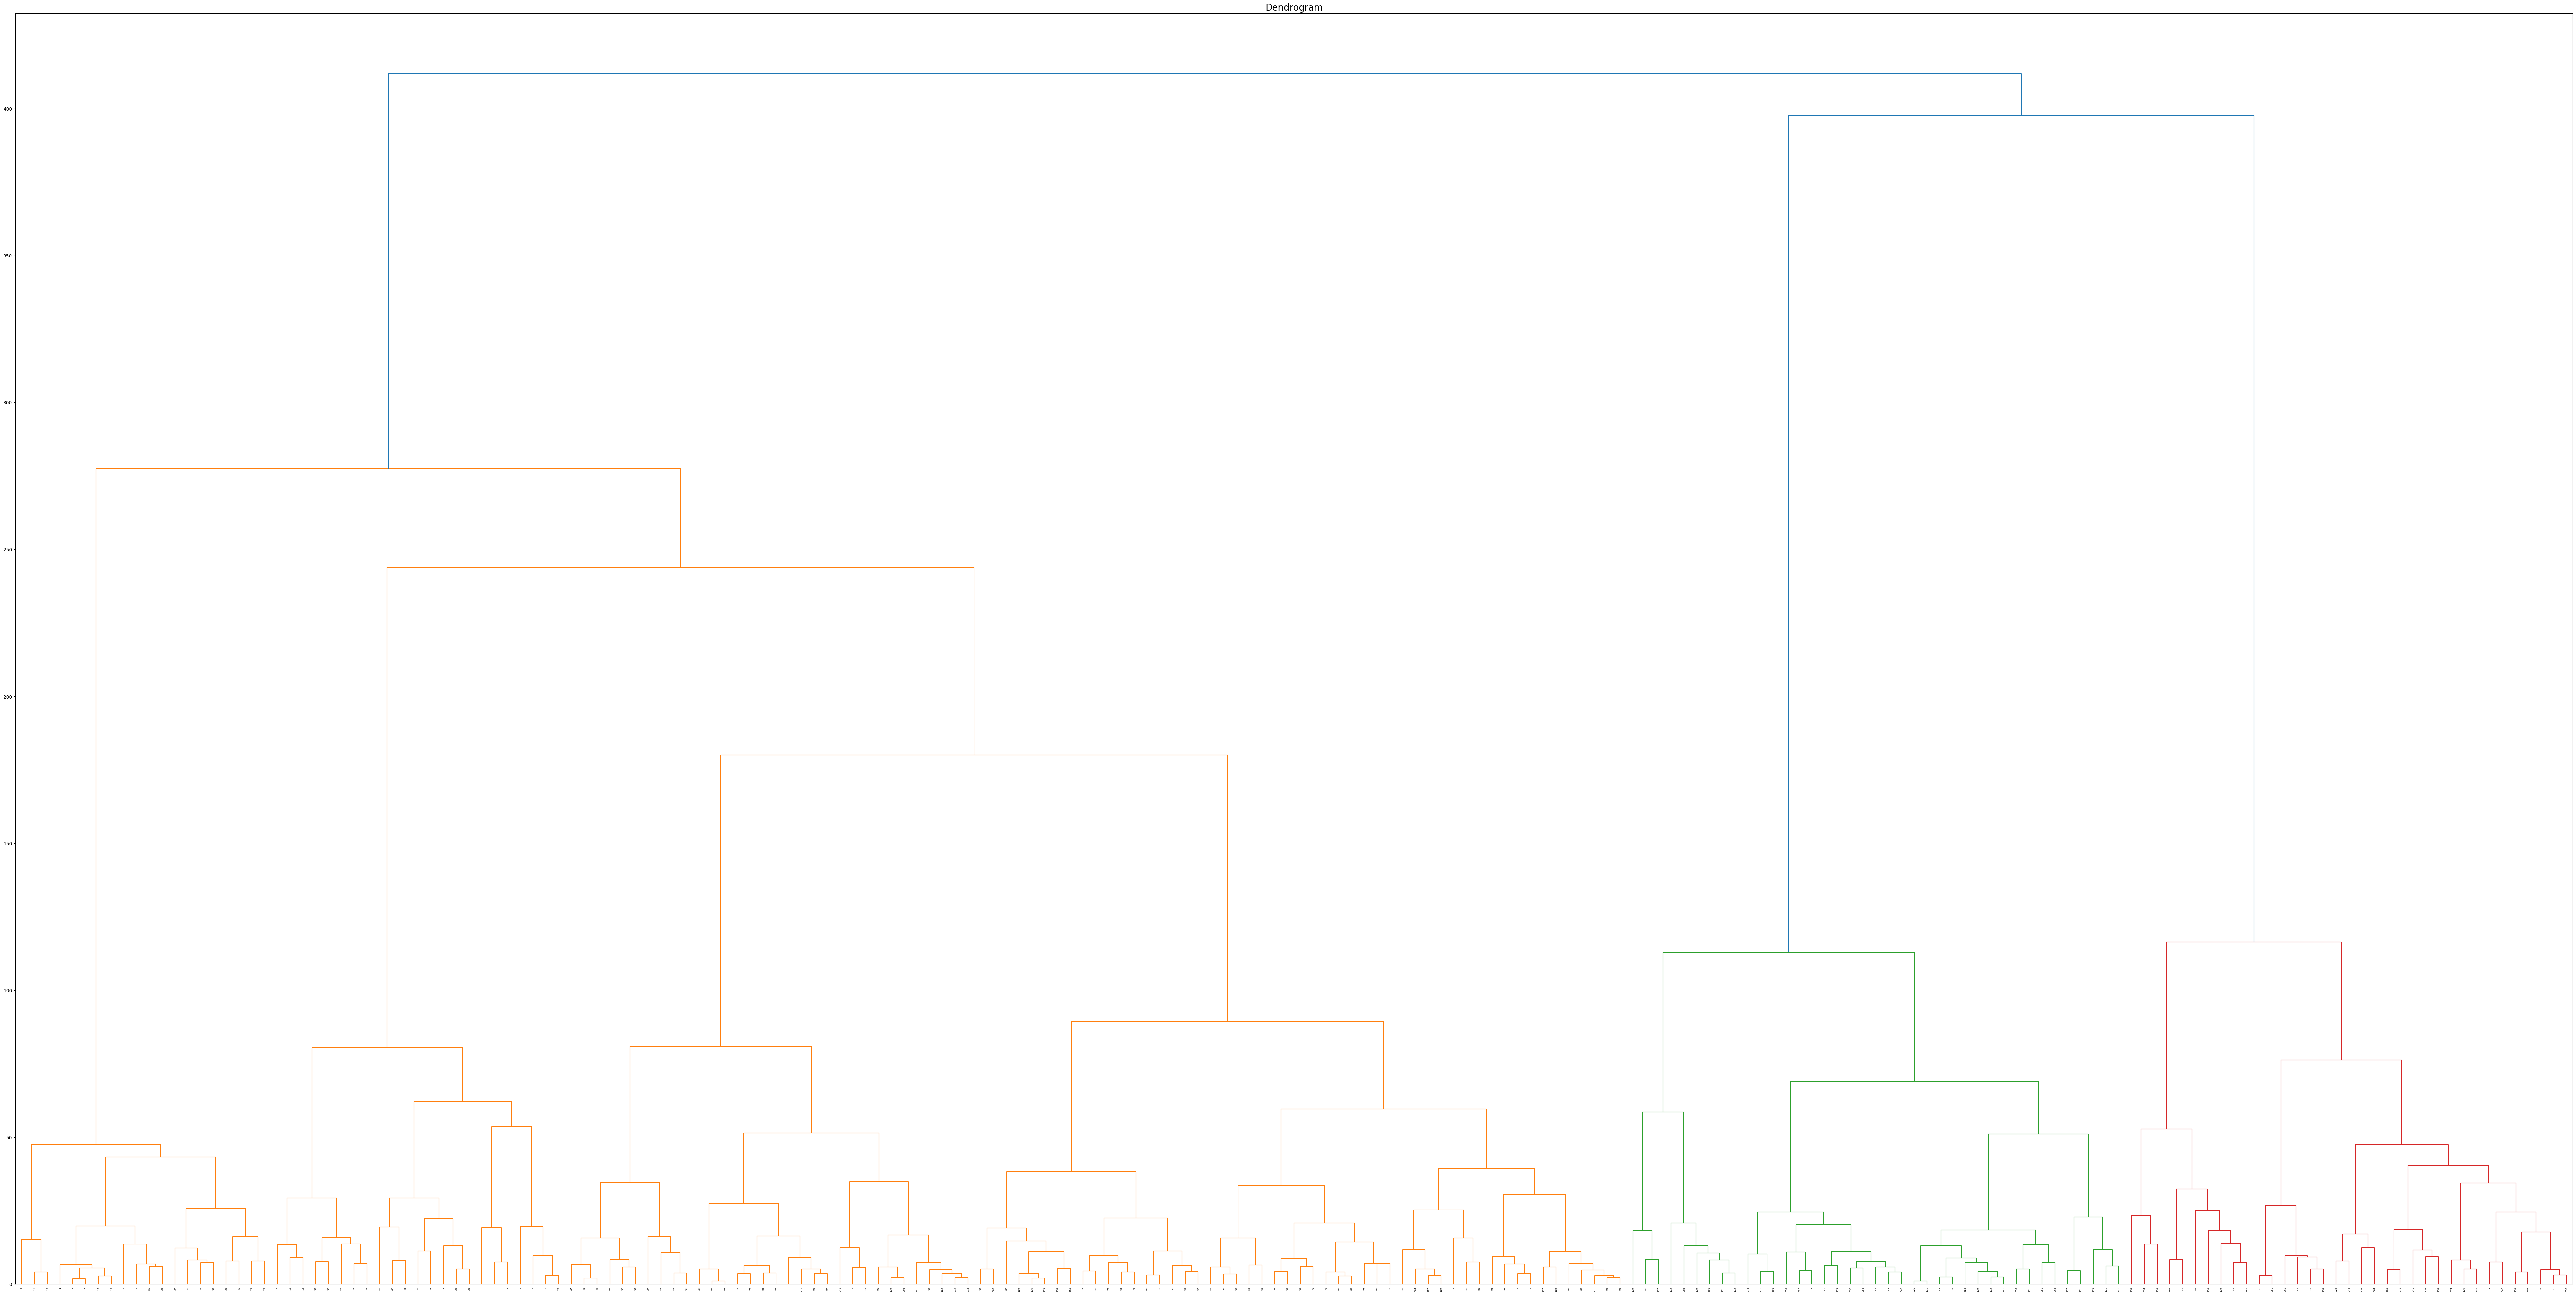

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (100, 50))
dendrogram = sch.dendrogram(sch.linkage(required_columns, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlable('Customers')
plt.ylable('Euclidean Distance')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

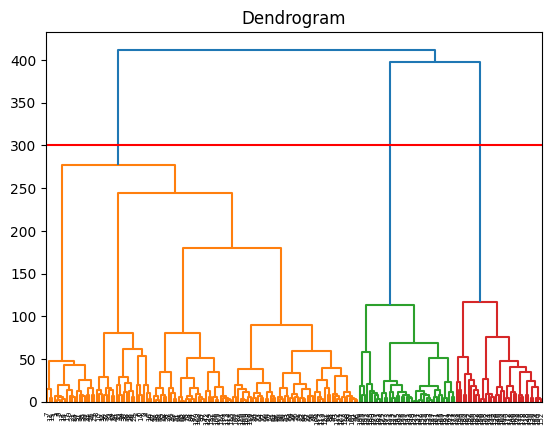

In [ ]:
#plt.figure(figsize = (100, 50))
dendrogram = sch.dendrogram(sch.linkage(required_columns, method ='ward'))
plt.axhline(y = 300, color = 'r')
plt.title('Dendrogram')
plt.xlable('Customers')
plt.ylable('Euclidean Distance')
plt.show()

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(required_columns)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

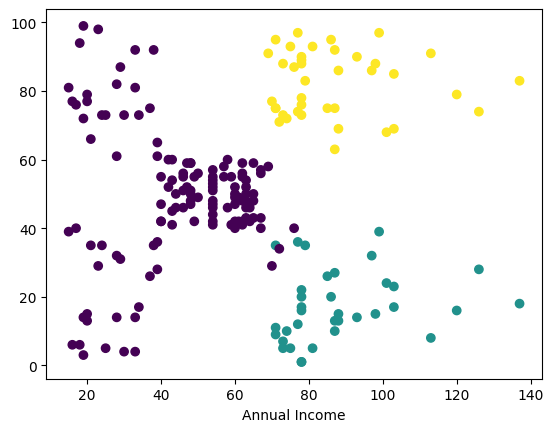

In [ ]:
plt.scatter(required_columns['Annual Income (k$)'], required_columns['Spending Score (1-100)'], c = cluster.labels_)
plt.xlabel('Annual Income')
plt.ylable('Spending Score')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
#step1: Load the data (assuming df is already loaded and 'required_columns' is defined as above)
df.rename(columns={'Genre':'Gender'}, inplace=True)
required_columns=df.iloc[:, 2:5]

In [ ]:
#step2: standardize the data
scalar = StandardScaler()
scaled_data = scalar.fit_transform(required_columns)

In [ ]:
#step3: Perform DBSCAN
dbscan = DBSCAN(eps = 0.5, min_samples = 6)
dbscan_labels = dbscan.fit_predict(scaled_data)

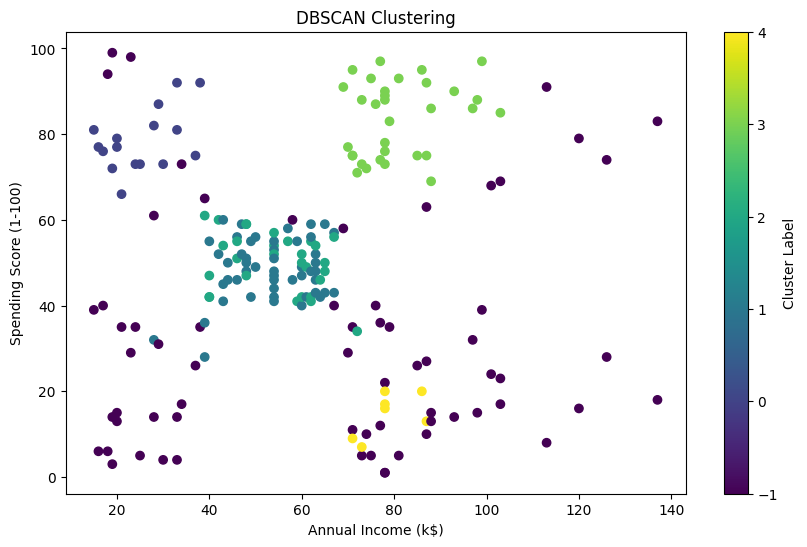

In [ ]:
#step4: Visualize the Clusters
plt.figure(figsize=(10,6))
plt.scatter(required_columns['Annual Income (k$)'], required_columns['Spending Score (1-100)'],
            c = dbscan_labels, cmap = 'viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
#Display the cluster labels
print(dbscan_labels)

[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  0
 -1  0  1 -1 -1  0 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  0  1  2  1 -1  1  2
  2  2  1  2  2  1  1  1  1  1  2  1  1  2  1  1  1  2  1  1  2  2  1  1
  1  1  1  2  1  1  2  1  1  1  1  1  2  1  1  2 -1  1  1  2  1  1  2  2
  1  2  1  2  2  1  1  2  1  2  1  1  1  1  1  2  1  2  2  2  1  1  1  1
  2 -1 -1  3 -1  3 -1  3 -1  3  4  3  2  3 -1  3  4  3 -1  3 -1  3 -1  3
 -1  3 -1  3 -1  3  4  3  4  3  4  3 -1  3 -1  3 -1  3 -1  3 -1  3  4  3
 -1 -1  4  3 -1  3 -1  3 -1  3 -1  3 -1  3 -1  3 -1  3 -1 -1 -1  3 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
